# Figure 2

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ipywidgets import interact, interactive
import sys

# Imports from epistasis API
from epistasis import plot
from epistasis.stats import pearson
from epistasis.simulate.linear import LinearSimulation
from epistasis.simulate.nonlinear import NonlinearSimulation
from epistasis.models.linear import EpistasisLinearRegression
#from epistasis.models.transformations import EpistasisLinearTransformation

Define and construct an additive genotype-phenotype map as follows:
$$
p_{00} = \beta_{0} \\
p_{01} = \beta_{0} + \beta_{1} \\
p_{10} = \beta_{0} + \beta_{2} \\
p_{11} = \beta_{0} + \beta_{1} + \beta_{2} + \beta{1,2} \\
$$

In [4]:
# Length of genotypes
length = 5
# Order of epistasis
order = 1 
# Construct a simulated epistatic genotype-phenotype map.
initial = LinearSimulation.from_length(length, model_type="global")
initial.set_coefs_order(1)
initial.set_coefs_random((-0.15, 0.15))
initial.epistasis.values[0] = 0.5 # Center the phenotypes at 0.5
initial.build()
initial.epistasis.values = np.array([ 0.5, -0.13463125, 0.12698641, 0.02709926, 0.09493059, 0.10254137])

The actual epistatic coefs set in the paper were:
```python
>>> initial.epistasis.values = np.array([ 0.5, -0.13463125, 0.12698641, 0.02709926, 0.09493059, 0.10254137])
```

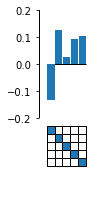

In [6]:
fig, ax = plot.coefs(initial.epistasis.values, initial.epistasis.sites, figsize=(1,3))

Define and construct a nonlinear mapping between the observed phenotype and the underlying phenotype. Here, we define a saturation function:
$$
p_{obs} = \frac{(k+1)\cdot p_{linear}}{k \cdot p_{linear}+1}
$$

In [7]:
def function(x, k):
    return ((k+1)*x) / (k*x + 1) 

We can sweep through the parameter, $k$, to tune the amount of nonlinearity.

In [8]:
k = 2
nonlinear = NonlinearSimulation.from_linear(initial, function=function, p0=(k,))

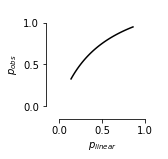

In [9]:
fig, ax = plt.subplots(figsize=[2,2])

x = np.linspace(min(initial.phenotypes),  max(initial.phenotypes), 100)
y = nonlinear.function(x, *nonlinear.parameters.get_params())
ax.plot(x, y, 'k-')
ax.set_ylabel("$p_{obs}$")
ax.set_xlabel("$p_{linear}$")
ax.axis([-0.15,1.15,-0.15,1.15])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['bottom'].set_bounds(0,1.)
ax.spines['left'].set_bounds(0,1.)
ax.set_xticks([0,.5,1])

If we fit the low-order, nonlinear genotype-phenotype map (with only 1st order terms), with a linear epistasis model, we see high-order epistasis.

(<matplotlib.figure.Figure at 0x10f183dd8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10f337668>])

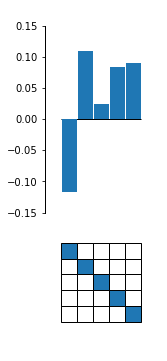

In [19]:
model = EpistasisLinearRegression.read_gpm(nonlinear, model_type="global")
model.fit()
plot.coefs(model.epistasis.values, model.epistasis.sites, figsize=(2,6))